## Keras 序列模型建模
### 基于 onehot 编码

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math


tf.__version__

'2.0.0'

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_labels_onehot = tf.one_hot(train_labels, depth=10).numpy()
test_labels_onehot = tf.one_hot(test_labels, depth=10).numpy()

#### 模型建立

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

In [7]:
model.add(tf.keras.layers.Dense(units=256,
                                kernel_initializer='normal',
                                activation='relu'))

In [8]:
model.add(tf.keras.layers.Dense(units=128,
                                kernel_initializer='normal',
                                activation='relu'))

In [9]:
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer='normal',
                                activation='relu'))

In [10]:
model.add(tf.keras.layers.Dense(units=32,
                                kernel_initializer='normal',
                                activation='relu'))

In [11]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#### 模型摘要

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
__________________________________________________

### 参数设置及训练

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
train_epochs = 10
batch_size = 40

In [15]:
train_history = model.fit(train_images, train_labels_onehot,
                          validation_split=0.2,
                          epochs=train_epochs,
                          batch_size=batch_size,
                          verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 145s 3ms/sample - loss: 0.3239 - accuracy: 0.9032 - val_loss: 0.1386 - val_accuracy: 0.9586
Epoch 2/10
48000/48000 [==============================] - 141s 3ms/sample - loss: 0.1158 - accuracy: 0.9654 - val_loss: 0.1302 - val_accuracy: 0.9592
Epoch 3/10
48000/48000 [==============================] - 142s 3ms/sample - loss: 0.0807 - accuracy: 0.9758 - val_loss: 0.1019 - val_accuracy: 0.9699
Epoch 4/10
48000/48000 [==============================] - 142s 3ms/sample - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0994 - val_accuracy: 0.9714
Epoch 5/10
48000/48000 [==============================] - 141s 3ms/sample - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.1204 - val_accuracy: 0.9672
Epoch 6/10
48000/48000 [==============================] - 142s 3ms/sample - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.1029 - val_accuracy: 0.9723
Epoch 7/10
48000/48000 [==========================

train_history.history 保存了训练中，四种基本数据 loss，accuracy，val_loss，val_accuracy 的值，并以字典形式存储

In [16]:
train_history.history

{'loss': [0.32386956638656555,
  0.11580678951577283,
  0.08069420200908402,
  0.057474158356781116,
  0.046842153635103995,
  0.03864645366907401,
  0.03133942916045271,
  0.02975376448806249,
  0.02482963896606937,
  0.02210053606606228],
 'accuracy': [0.90316665,
  0.9653958,
  0.97577083,
  0.982375,
  0.9853333,
  0.98833334,
  0.9897708,
  0.99058336,
  0.992,
  0.99291664],
 'val_loss': [0.1386103215805876,
  0.13024117694740805,
  0.10186999143411715,
  0.09937536970265985,
  0.1203663934887542,
  0.10294981063261123,
  0.10740806087201539,
  0.10651071226072721,
  0.09627585080283704,
  0.10002141902339645],
 'val_accuracy': [0.95858335,
  0.95925,
  0.96991664,
  0.97141665,
  0.96716666,
  0.9723333,
  0.97375,
  0.974,
  0.97783333,
  0.97533333]}

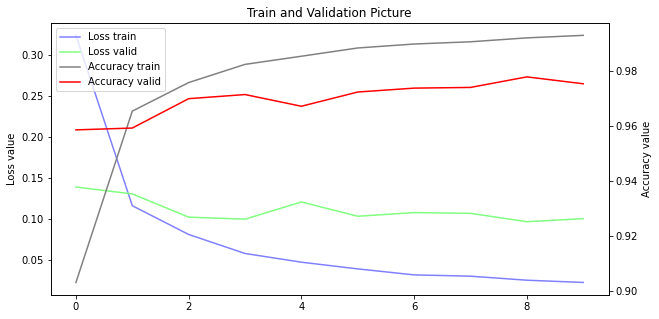

In [17]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(train_history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(train_history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(train_history.history['accuracy'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(train_history.history['val_accuracy'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

#### 模型评估
返回值为一个列表，分别赋值给 test_loss，test_acc

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels_onehot, verbose=2)
print('test_loss:', test_loss,
      '\ntest_acc:', test_acc,
      '\nmetrics_names:', model.metrics_names)

10000/1 - 25s - loss: 0.0496 - accuracy: 0.9759
test_loss: 0.09910532588202041 
test_acc: 0.9759 
metrics_names: ['loss', 'accuracy']


#### 模型预测

In [19]:
def plot_apply_images(num):
    if num < 1:
        print('INFO:The number of input pictures must be greater than zero!')
    else:
        test_pred = model.predict_classes(test_images)
        choose_list = []
        for i in range(num):
            choose_n = np.random.randint(len(test_images))
            choose_list.append(choose_n)
        fig = plt.gcf()
        fig.set_size_inches(18, 5 * math.ceil(num / 3))

        for i in range(num):
            ax_img = plt.subplot(math.ceil(num / 3), 3, i + 1)
            plt_img = test_images[choose_list[i]]
            ax_img.imshow(plt_img, cmap='binary')
            ax_img.set_title('Original label:' \
                             + str(test_labels[choose_list[i]]) \
                             + ' Predict label:' \
                             + str(test_pred[choose_list[i]]),
                             fontsize=10)
            ax_img.set_xticks([])
            ax_img.set_yticks([])
        plt.show()

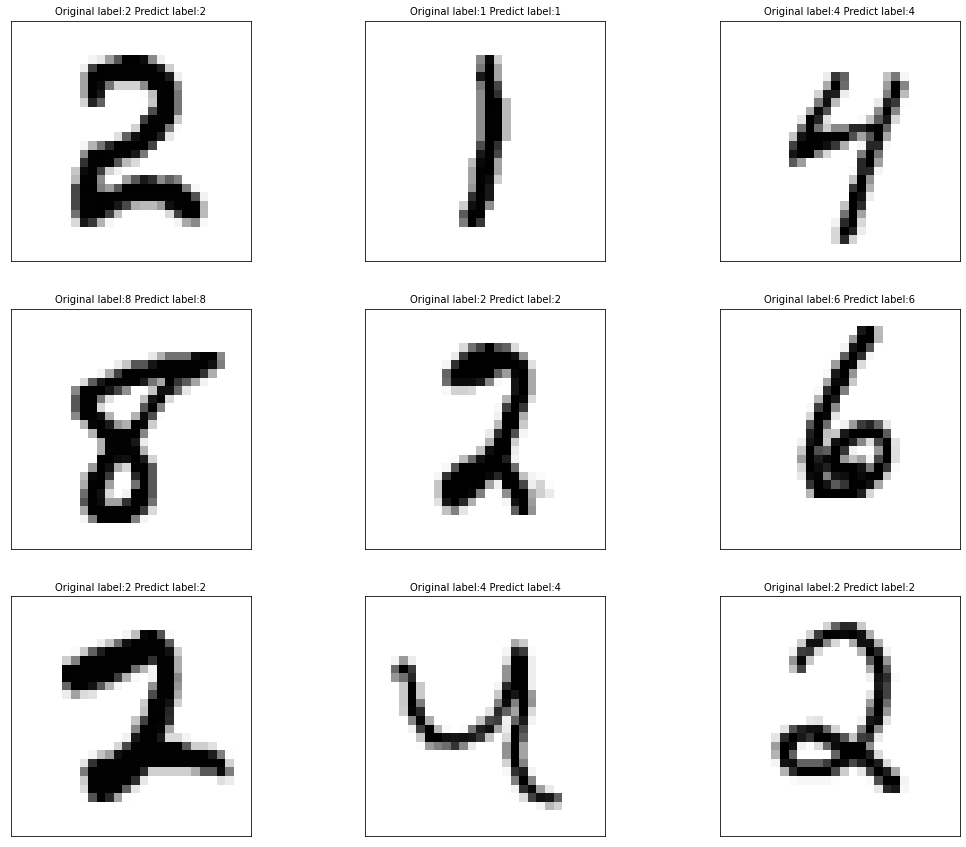

In [20]:
plot_apply_images(9)

#### 注意  
以下两个 cell 等价，predict_classes 能直接预测整数分类值，predict返回 onehot 预测值

In [21]:
test_pred = model.predict(test_images)
print('test_pred.shape', test_pred.shape,
      '\ntest_pred[0]', np.argmax(test_pred[0]))

test_pred = model.predict_classes(test_images)
print('test_pred.shape', test_pred.shape,
      '\ntest_pred[0]', test_pred[0],
      '\ntest_labels[0]', test_labels[0])

test_pred.shape (10000, 10) 
test_pred[0] 7
test_pred.shape (10000,) 
test_pred[0] 7 
test_labels[0] 7


### 基于整数型编码

In [22]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=64,
                                kernel_initializer='normal',
                                activation='relu'),
    tf.keras.layers.Dense(units=32,
                                kernel_initializer='normal',
                                activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
train_epochs = 10
batch_size = 40

In [28]:
train_history = model.fit(train_images, train_labels,
                          validation_split=0.2,
                          epochs=train_epochs,
                          batch_size=batch_size,
                          verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.3811 - accuracy: 0.8907 - val_loss: 0.1879 - val_accuracy: 0.9455
Epoch 2/10
48000/48000 [==============================] - 4s 88us/sample - loss: 0.1703 - accuracy: 0.9496 - val_loss: 0.1588 - val_accuracy: 0.9517
Epoch 3/10
48000/48000 [==============================] - 4s 85us/sample - loss: 0.1252 - accuracy: 0.9621 - val_loss: 0.1207 - val_accuracy: 0.9653
Epoch 4/10
48000/48000 [==============================] - 4s 85us/sample - loss: 0.1004 - accuracy: 0.9698 - val_loss: 0.1209 - val_accuracy: 0.9644
Epoch 5/10
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0806 - accuracy: 0.9752 - val_loss: 0.1053 - val_accuracy: 0.9693
Epoch 6/10
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0673 - accuracy: 0.9789 - val_loss: 0.1070 - val_accuracy: 0.9668
Epoch 7/10
48000/48000 [==============================] 

#### 训练可视化

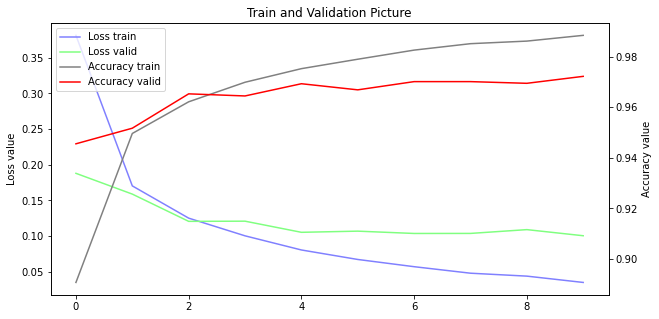

In [29]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(train_history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(train_history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(train_history.history['accuracy'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(train_history.history['val_accuracy'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

#### 模型预测

In [30]:
def plot_apply_images(num):
    if num < 1:
        print('INFO:The number of input pictures must be greater than zero!')
    else:
        test_pred = model.predict_classes(test_images)
        choose_list = []
        for i in range(num):
            choose_n = np.random.randint(len(test_images))
            choose_list.append(choose_n)
        fig = plt.gcf()
        fig.set_size_inches(18, 5 * math.ceil(num / 3))

        for i in range(num):
            ax_img = plt.subplot(math.ceil(num / 3), 3, i + 1)
            plt_img = test_images[choose_list[i]]
            ax_img.imshow(plt_img, cmap='binary')
            ax_img.set_title('Original label:' \
                             + str(test_labels[choose_list[i]]) \
                             + ' Predict label:' \
                             + str(test_pred[choose_list[i]]),
                             fontsize=10)
            ax_img.set_xticks([])
            ax_img.set_yticks([])
        plt.show()

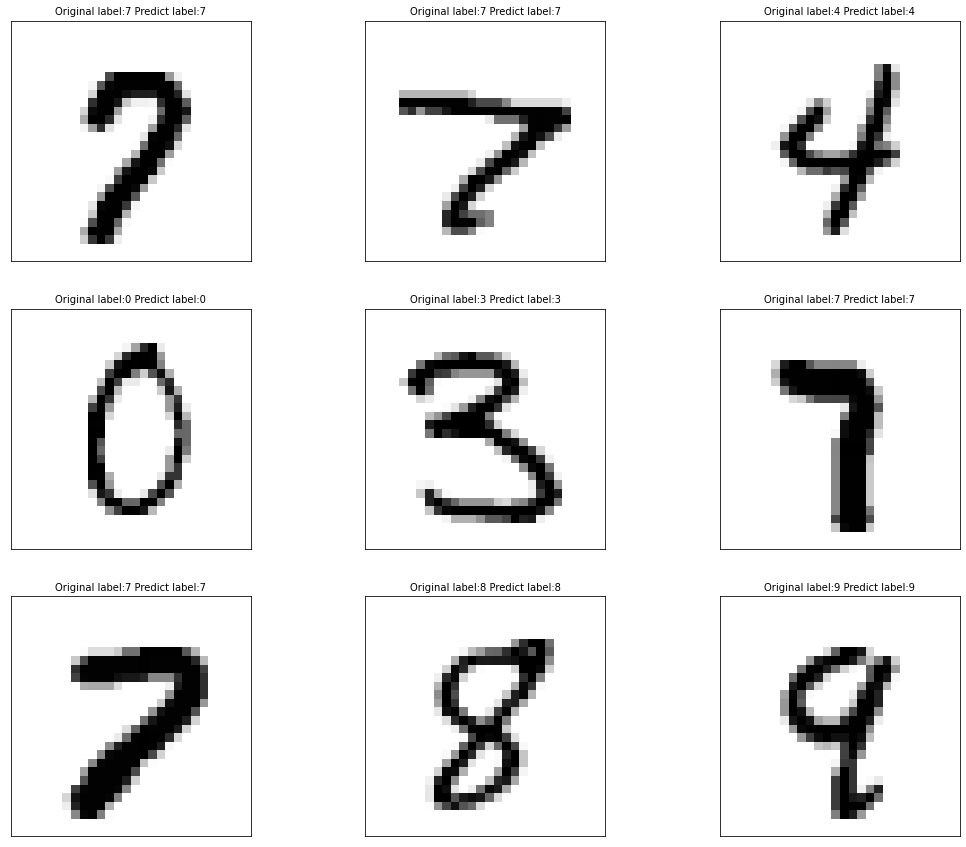

In [31]:
plot_apply_images(9)